In [33]:
import sys
import time
import torch
import torchvision
from torchvision import transforms
import warnings
import matplotlib.pyplot as plt
import cProfile
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
warnings.filterwarnings("ignore")


class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

    def text_labels(self, indices):
        """Return text labels."""
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]
        
    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train
                                           , num_workers=self.num_workers)


def load_time(data):
    tic = time.time()
    for X, y in data.train_dataloader():
        continue
    return time.time() - tic

In [16]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

In [17]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [21]:
f'{load_time(data):.2f} sec'

'4.30 sec'

# 4.2.5. Exercises

## 1. Does reducing the batch_size (for instance, to 1) affect the reading performance?

Reducing the batch size in machine learning, particularly during training, can indeed affect the reading performance and overall training dynamics. Here's how it can impact different aspects:

**Reading Performance:**
When the batch size is reduced, the number of examples processed together in each iteration decreases. This can lead to an increase in the frequency of data loading and preprocessing operations, which may affect reading performance in the following ways:

1. **Higher Overhead:** Smaller batch sizes result in more frequent data loading, which can increase overhead due to data loading and preprocessing operations. This might lead to slower training if these operations take a significant amount of time.

2. **I/O and Disk Access:** Frequent data loading can put a strain on I/O systems, particularly in cases where data needs to be fetched from disk or over a network. Disk access latency and bandwidth limitations might become more pronounced with smaller batch sizes.

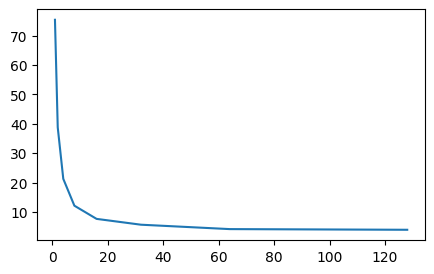

In [32]:
batches = d2l.gen_logrithm_nums(initial_value=1, growth_factor=2,
                                num_elements=8)
ts = [load_time(FashionMNIST(batch_size=batch, resize=(32, 32))) 
      for batch in batches]
plt.figure(figsize=(5, 3))
plt.plot(batches, ts)
plt.show()

## 2. The data iterator performance is important. Do you think the current implementation is fast enough? Explore various options to improve it. Use a system profiler to find out where the bottlenecks are.

{method '**poll**' of 'select.poll' objects} is the main bottleleneck. And we have some aspects to help improving Data Iterator Performance:
1. **Batching and Prefetching:** Implement batching and prefetching mechanisms to load and preprocess data in parallel. This can help overlap data loading with model computation, reducing overall training time.

2. **Parallelism:** Utilize multi-threading or multiprocessing to load and preprocess data in parallel. Libraries like TensorFlow's `tf.data` and PyTorch's `DataLoader` offer options to achieve this.

3. **Data Format:** Use efficient data formats like TFRecords or binary formats that can be read faster compared to text-based formats.

4. **Caching:** Cache preprocessed data to avoid redundant preprocessing during each epoch. This can be especially beneficial if data preprocessing is complex and time-consuming.

5. **Data Shuffling:** Shuffle the data at the beginning of each epoch to improve convergence speed and reduce potential bias in gradient updates.

6. **I/O Optimizations:** Minimize I/O operations by reading larger chunks of data at once, reducing the overhead associated with frequent small reads.

In [35]:
profiler = cProfile.Profile()
profiler.enable()
# Call the function you want to profile
load_time(data)
profiler.disable()
profiler.print_stats(sort="tottime")

         509245 function calls (509239 primitive calls) in 6.032 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      942    3.831    0.004    3.831    0.004 {method 'poll' of 'select.poll' objects}
    13132    0.623    0.000    0.623    0.000 {built-in method posix.read}
     1876    0.159    0.000    0.159    0.000 {method 'recvmsg' of '_socket.socket' objects}
        1    0.097    0.097    6.032    6.032 1668487492.py:38(load_time)
     1876    0.071    0.000    0.071    0.000 {method 'connect' of '_socket.socket' objects}
     7504    0.066    0.000    0.066    0.000 {built-in method posix.write}
      938    0.057    0.000    1.719    0.002 {built-in method _pickle.loads}
     1876    0.051    0.000    0.051    0.000 {built-in method torch.tensor}
        4    0.047    0.012    0.047    0.012 {built-in method posix.fork}
    13132    0.042    0.000    0.675    0.000 connection.py:373(_recv)
      939    0.041    0.0

## 3. Check out the framework’s online API documentation. Which other datasets are available?

In [36]:
torchvision.datasets??

Type:        module
String form: <module 'torchvision.datasets' from '/home/jovyan/.local/lib/python3.11/site-packages/torchvision/datasets/__init__.py'>
File:        ~/.local/lib/python3.11/site-packages/torchvision/datasets/__init__.py
Source:     
from ._optical_flow import FlyingChairs, FlyingThings3D, HD1K, KittiFlow, Sintel
from ._stereo_matching import (
    CarlaStereo,
    CREStereo,
    ETH3DStereo,
    FallingThingsStereo,
    InStereo2k,
    Kitti2012Stereo,
    Kitti2015Stereo,
    Middlebury2014Stereo,
    SceneFlowStereo,
    SintelStereo,
)
from .caltech import Caltech101, Caltech256
from .celeba import CelebA
from .cifar import CIFAR10, CIFAR100
from .cityscapes import Cityscapes
from .clevr import CLEVRClassification
from .coco import CocoCaptions, CocoDetection
from .country211 import Country211
from .dtd import DTD
from .eurosat import EuroSAT
from .fakedata import FakeData
from .fer2013 import FER2013
from .fgvc_aircraft import FGVCAircraft
from .flickr import Flic